# I-94 Heavy Traffic: An Analysis of Factors Affecting Heavy Traffic on I-94

## Introduction
<br>Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States [[1]](https://en.wikipedia.org/wiki/Interstate_94). Like with the most of the states in the world, I-94 is experiencing a heavy traffic. So why is heavy traffic a problem that needs to be addressed ? Heavy traffic has a negative impact not just on us humans, but it also affects our environment. One of the reasons that it is causing is air pollution, the wasted fuel and carbon dioxide emissions due to the increased in idling, accelarion and breaking. Evidence from epidemiological and toxicological studies indicates that transport-related air pollution affects a number of health outcomes [(World Health Organization, 2005)](https://www.euro.who.int/en/data-and-evidence/evidence-informed-policy-making/publications/hen-summaries-of-network-members-reports/what-are-the-effects-on-health-of-transport-related-air-pollution#:~:text=Evidence%20from%20epidemiological%20and%20toxicological,allergic%20respiratory%20symptoms%20and%20disease.).
<br>

We might ask ourselves, *How can we avoid the heavy traffic ?* The easy answer might be by reducing the number of cars that are allowed to travel, but we all know that this is not a viable option. The main goal of our analysis is to determine a few factors causing the heavy traffic on I-94. These factors can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.
<br>

We are going to use the dataset **Metro Interstate Traffic Volume Dataset by John Hogue** for this analysis. This dataset spans from 2012-2018, and it is avaliable for download in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway. Below, we can see the information that is contained in this dataset.

Attribute Information:

|Attribute|Datatype|Description|
|---|---|---|
|holiday |Categorical |US National holidays plus regional holiday, Minnesota State Fair|
|temp| Numeric|Average temperature in kelvin|
|rain_1h |Numeric |Amount in mm of rain that occurred in the hour|
|snow_1h|Numeric|Amount in mm of snow that occurred in the hour|
|clouds_all | Numeric| Percentage of cloud cover|
|weather_main |Categorical| Short textual description of the current weather|
|weather_description| Categorical |Longer textual description of the current weather|
|date_time| DateTime| Hour of the data collected in local CST time|
|traffic_volume |Numeric| Hourly I-94 ATR 301 reported westbound traffic volume|

Before we begin, we are going to import the modules and the dataset that we will be using in this analysis.

In [1]:
#Data manipulation modules
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
#Visualization modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\regin\Desktop\R\Metro_Interstate_Traffic_Volume.csv')

---

## Initial Data Exploration

To start our exploration, we will inspect an overview of our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


As we can see, we have 9 attributes just as mentioned above. But the datatype for `date_time` column is an *object* type so we will deal with this one on our **data cleaning** phase. And the number of entires has a total of *48,204 observations*, we can see that there's no missing/null values.

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


Since we are mostly concered with the heavy traffic, we will explore the `traffic_volume` attribute just to see the distribution of data.

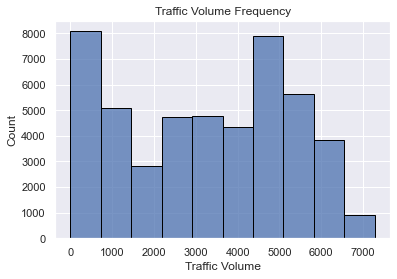

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
sns.set_theme()
sns.histplot(data = df, x='traffic_volume',bins = 10,edgecolor = 'black',)
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume Frequency')
plt.show()

df['traffic_volume'].describe()

As we can see, we have a bimodal distribution that peaks around **0-1,000** and **4,000-5,000**. We will further investigate the factors and timings that are affecting this `traffic_volume` later. We can make a few notes regarding this attribute:
- About 25% of the time, the volume of traffic is 1,193 cars or fewer passing the station each hour.
- And in about anpther 25% of the time, we observed that there's 4,933 cars or more that is passing the station. We can see that it is three times more than the first observation we stated.
- Due to the bimodal distribution having two peaks. There's a possibility that the time of the day is affecting our distribution.

We will start our **data cleaning** process with these things in mind.

---

## Data Cleaning

Looking at the initial data exploration we've done, we can eyeball that the dataset is pretty much in a clean state. But we will still have to investigate the dataset just to be sure.

In [6]:
df['weather_description'].value_counts(ascending = False)

sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thundersto

<br>We can see that we have a value of *sky is clear* and *Sky is Clear*, since these values contains a huge amount of data we will combine it.

In [7]:
df['date_time'] = df['date_time'].apply(pd.to_datetime)
df['weather_description'].replace({'Sky is Clear':'sky is clear'},inplace = True)
df['weather_description'].value_counts()[:5]

sky is clear        13391
mist                 5950
overcast clouds      5081
broken clouds        4666
scattered clouds     3461
Name: weather_description, dtype: int64

<br>We can confirm that we've added the two values above.

<br>Like we mentioned, there's a possibility that the time of the day is affecting our distribution. So we are going to separate our dataset in a `daytime` and `nighttime`.

In [8]:
daytime = df[(df['date_time'].dt.hour >=7) &(df['date_time'].dt.hour <19)]  
nighttime = df[(df['date_time'].dt.hour >=19) | (df['date_time'].dt.hour <7) ]  

print('Day time number of observations:',daytime.shape[0])
print('Night time number of observations:',nighttime.shape[0])

Day time number of observations: 23877
Night time number of observations: 24327


<br>As we can see, we've separated the dataset into two separate dataset. We can now continue on our **data analysis** process by using these datasets.

---

## Data Analysis
Remember that our goal is to determine the factors that contributes to the heavy traffic. We will analyze the effects of the following attributes:
- Time (Month, Day of the week, Hour)
- Numerical weather
- Categorical weather
<br>

We will start our analysis by looking at the `traffic_volume` of the two datasets we isolated.

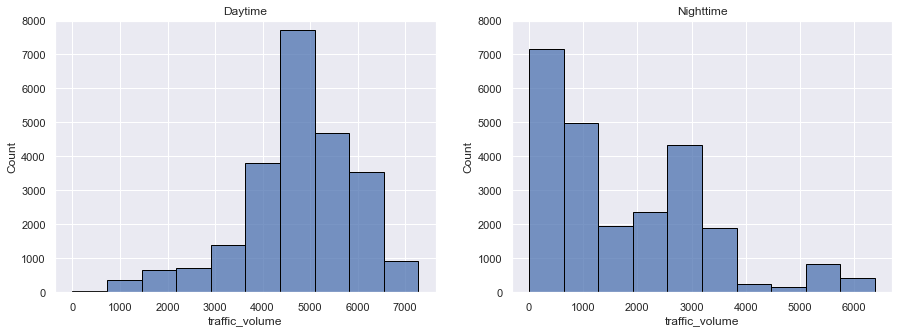

In [9]:
isolated_dataset = [daytime,nighttime]
title = ['Daytime','Nighttime']

plt.figure(figsize = (15,5))

for data in range(0,2):
    plt.subplot(1,2,data+1)
    sns.histplot(data = isolated_dataset[data], x = 'traffic_volume',bins = 10, edgecolor = 'Black')
    plt.ylim(0, 8000)
    plt.title('{}'.format(title[data]))

plt.show()

As we can observe from the graph above, there's typically higher volume on **daytime** compared to **nighttime**. And since our goal is to find the factors affecting the heavy traffic, we will continue our analysis using the **daytime** dataset.

<br>

We are going to observe the peak of the traffic volume relative to the:
- Month
- Day of the week
- Hour

#### Month

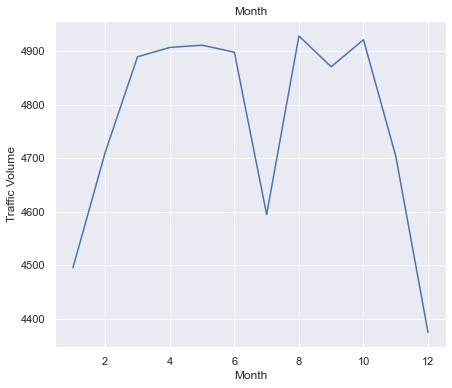

In [10]:
daytime.loc[:,'month']= daytime['date_time'].dt.month
month = daytime.groupby('month')['traffic_volume'].mean()
plt.figure(figsize = (7,6))
sns.lineplot(data = month).set(xlabel = 'Month',ylabel = 'Traffic Volume',title = 'Month')
plt.show()

We can observe that the traffic is usually **heavier during warm months (March–October)** compared to cold months (November–February).

#### Day of the week

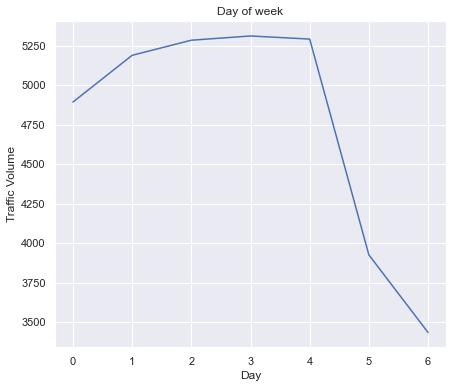

In [11]:
daytime.loc[:,'day'] = daytime['date_time'].dt.dayofweek
dayofweek = daytime.groupby('day')['traffic_volume'].mean()
plt.figure(figsize = (7,6))
sns.lineplot(data = dayofweek).set(xlabel = 'Day',ylabel = 'Traffic Volume',title = 'Day of week')
plt.show()

We can observe that the traffic is usually **heavier on business days** compared to weekends.

#### Hour

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

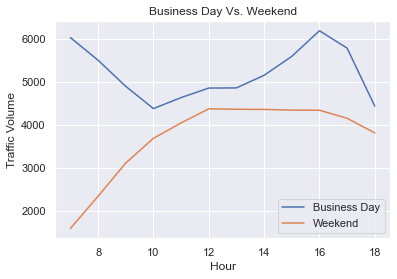

In [12]:
daytime.loc[:,'hour'] = daytime['date_time'].dt.hour

business_day = daytime[daytime['day']<=4]
hour_by_business_day = business_day.groupby('hour')['traffic_volume'].mean()
weekend = daytime[daytime['day']>=5]
hour_by_weekend = weekend.groupby('hour')['traffic_volume'].mean()

sns.lineplot(data = hour_by_business_day,label = 'Business Day' )
sns.lineplot(data = hour_by_weekend,label =  'Weekend')
plt.title('Business Day Vs. Weekend')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

Observing the graph above, we can say that the rush hour for the following days: 
>Business day peak hours - 7 am and 4pm
<br>Weekened peak hours - 12pm to 4pm

#### Relationship of traffic volume with weather attributes

We will start our analysis with the numerical weather attributes:
- temp
- rain_1h
- snow_1h
- clouds_all

In [13]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day              -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can observe that there's no strong correlation for the numerical weather. The highest one is `temp` with a value of 0.12, which is a very weak pearson's r value.

Now we are going to look into our categorical weather attributes:
- weather_main
- weather_description

Since we are concern with the relationship of these categorical values with the traffic volume. We are going to group by our dataset by these weather attributes.

In [14]:
by_weather_main = daytime.groupby('weather_main').mean().sort_values('traffic_volume',ascending = False)
by_weather_description = daytime.groupby('weather_description').mean().sort_values('traffic_volume',ascending = False)

#### Weather main

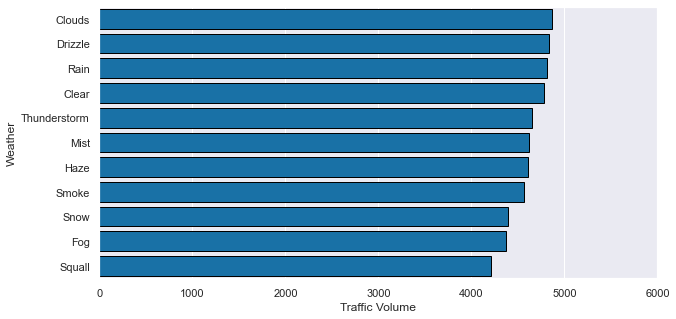

In [20]:
plt.figure(figsize = (10,5))
(
sns.barplot(data = by_weather_main, y = by_weather_main.index,x = by_weather_main['traffic_volume'], color = '#0277bd', edgecolor = 'black')
    .set(xlabel = 'Traffic Volume',ylabel = 'Weather', xlim = ([0,6000]))
)
plt.show()

We can see that the effect of `weather_main` does not vary alot for the traffic volume.

#### Weather description

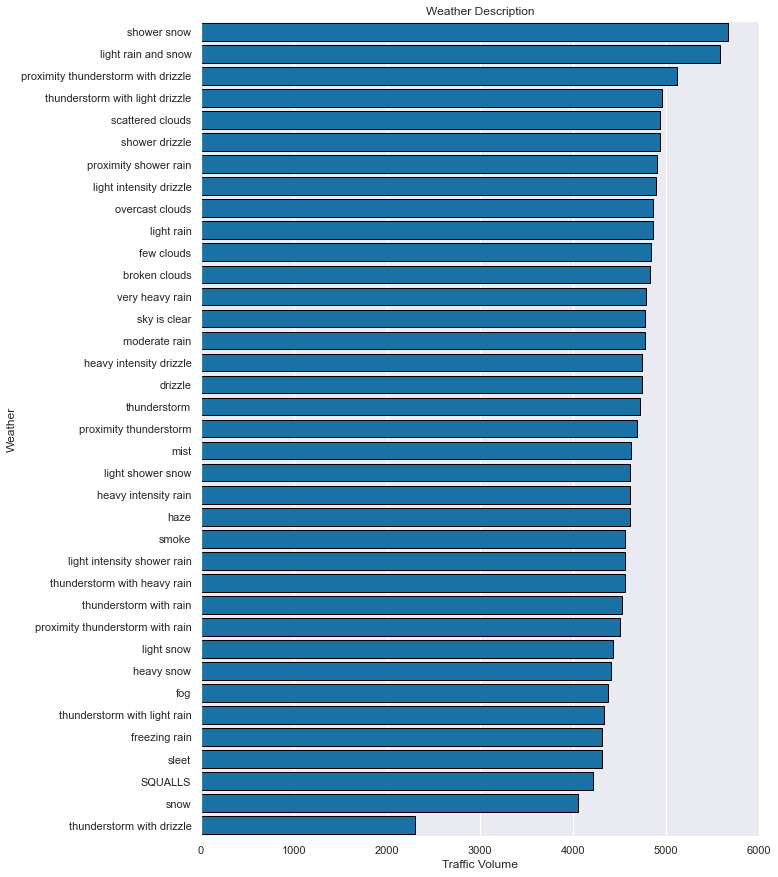

In [16]:
plt.figure(figsize = (10,15))
(
sns.barplot(data = by_weather_description, y = by_weather_description.index,x = by_weather_description['traffic_volume'], color = '#0277bd', edgecolor = 'black')
    .set(xlabel = 'Traffic Volume',ylabel = 'Weather', xlim = ([0,6000]),title = 'Weather Description')
)
plt.show()

As we can observe, the main contributor for the weather that might be causing the heavy traffic with a volume of over **5,000** are the following:
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

---

## Conclusion

There's a lot of factors that affects the heavy traffic for I-94. We can observe from the result of our analysis that these attributes contributes for the heavy traffic:
- There's typically higher traffic volume on day time compared to night time. 
- I-94 is also experiencing a heavier traffic during warm months (March–October).
- The traffic is typically heavier on business days compared to weekends. And the peak hours of these days are shown below:
>Business day peak hours - 7 am and 4pm
<br>Weekened peak hours - 12pm to 4pm
- Weather indicators does not vary a lot but if we look in the certain weather we can observe that there's a heavier traffic during:
 >Shower snow
<br>Light rain and snow
<br>Proximity thunderstorm with drizzle

We can say that, **typically when there's a snow the traffic became heavier than usual.**